# Assignment 2

<br/>

### 2019150445 신백록
----------------------

<br/><br/><br/>
<hr style="border: 5px solid #990000;" />
<hr style="border: 1px solid #dbbcac;" />


# 0. Data Preprocessing

In [1]:
import os
import numpy as np
import tarfile
from six.moves import urllib

In [2]:
Download_root='https://raw.githubusercontent.com/ageron/handson-ml2/master/'

In [3]:
Housing_path=os.path.join('datasets','housing')

In [4]:
Housing_url=Download_root+'datasets/housing/housing.tgz'

In [5]:
def fetch_housing_data(housing_url=Housing_url,housing_path=Housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [6]:
import pandas as pd
def load_housing_data(housing_path=Housing_path):
    csv_path=os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [7]:
fetch_housing_data()

In [8]:
housing_data=load_housing_data()

In [9]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


---
## Missing values

In [10]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
pd.isnull(housing_data).sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### There are 207 missing instances. Since there are almost 20,000 data, 207 instances can be ignored.

---
## New attributes

In [12]:
housing_data=housing_data.dropna(subset=['total_bedrooms'])

In [13]:
housing_data['rooms_per_household']=housing_data['total_rooms']/housing_data['households']
housing_data['bedrooms_per_room']=housing_data['total_bedrooms']/housing_data['total_rooms']
housing_data['population_per_household']=housing_data['population']/housing_data['households']

In [14]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20433 non-null  float64
 1   latitude                  20433 non-null  float64
 2   housing_median_age        20433 non-null  float64
 3   total_rooms               20433 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20433 non-null  float64
 6   households                20433 non-null  float64
 7   median_income             20433 non-null  float64
 8   median_house_value        20433 non-null  float64
 9   ocean_proximity           20433 non-null  object 
 10  rooms_per_household       20433 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20433 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.2+ MB


---
## Split train, test set

<AxesSubplot:>

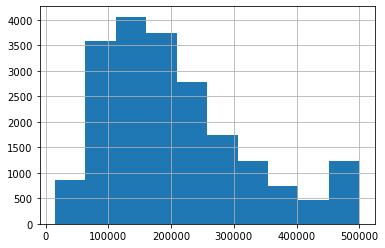

In [15]:
housing_data['median_house_value'].hist()

#### Since there is some distribution in our target value, I will preserve this distribution in test set.

In [16]:
housing_data['median_house_value_cat']=pd.cut(housing_data['median_house_value'],
                                              bins=[0.,70000.,150000.,250000.,350000.,np.inf],
                                              labels=[5,4,3,2,1])

<AxesSubplot:>

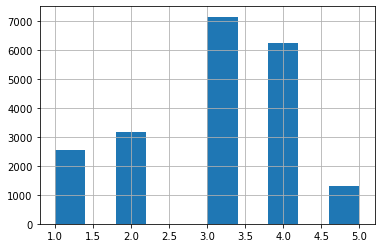

In [17]:
housing_data['median_house_value_cat'].hist()

In [18]:
y_label=housing_data['median_house_value_cat'] #for stratify
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing_data,stratify=y_label,test_size=.2,random_state=42)

In [19]:
print(train_set.shape)
print(test_set.shape)

(16346, 14)
(4087, 14)


In [20]:
train_set=train_set.drop('median_house_value_cat',axis=1)
test_set=test_set.drop('median_house_value_cat',axis=1)

In [21]:
y_train=train_set['median_house_value']
y_test=test_set['median_house_value']
X_train=train_set.drop('median_house_value',axis=1)
X_test=test_set.drop('median_house_value',axis=1)

In [22]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(16346, 12)
(4087, 12)
(16346,)
(4087,)


---
## Standardization & One-hot encoding

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_pipeline=Pipeline([
    ('std_scaler',StandardScaler())
])

num_attribs=list(X_train.drop('ocean_proximity',axis=1))
cat_attribs=['ocean_proximity']

full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

X_train_std=full_pipeline.fit_transform(X_train) 


#### Fit only the train set since there is std_scaler in pipeline

In [24]:
pd.DataFrame(X_train_std)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.888660,1.397135,0.426071,-0.088085,-0.084626,-0.304102,-0.114843,-0.428097,-0.027589,-0.130396,-0.066147,0.0,1.0,0.0,0.0,0.0
1,0.679987,-0.711227,1.850235,-0.603346,-0.352503,-0.206891,-0.361353,-0.714378,-0.701310,1.493515,0.021039,1.0,0.0,0.0,0.0,0.0
2,0.635169,-0.809617,0.426071,-0.461267,-0.108124,0.089079,-0.000670,-0.659500,-0.842709,1.595785,-0.000821,1.0,0.0,0.0,0.0,0.0
3,0.500713,-0.683115,0.584311,0.152011,-0.230314,-0.160022,-0.226421,1.398925,0.680285,-1.131769,-0.005529,1.0,0.0,0.0,0.0,0.0
4,0.645128,-0.861155,0.742552,-0.526911,-0.493492,-0.191268,-0.428819,0.067541,-0.400387,0.184149,0.049986,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-1.316926,0.998889,0.900792,-0.966187,-0.998700,-0.764115,-0.947787,-0.563056,-0.680138,0.307743,0.091985,0.0,0.0,0.0,1.0,0.0
16342,0.540552,-0.655004,0.426071,-0.302102,-0.524039,-0.442974,-0.501474,1.170626,0.375327,-0.916486,-0.007654,1.0,0.0,0.0,0.0,0.0
16343,0.794523,-0.889266,0.030470,0.359734,0.225548,0.720079,0.310711,0.457107,0.043897,-0.497531,0.053479,1.0,0.0,0.0,0.0,0.0
16344,0.585370,-0.772135,0.584311,-0.612788,-0.702624,-0.627847,-0.735010,1.100490,0.175935,-0.444217,0.016418,1.0,0.0,0.0,0.0,0.0


In [25]:
np.mean(X_train_std,axis=0) #zero mean except categorical attributes.

array([ 4.24748264e-15,  2.52347866e-15,  1.21972519e-16,  5.90158318e-17,
       -1.13005571e-16, -2.85740136e-17,  4.23142631e-18,  5.67269222e-17,
        5.33580820e-17,  1.75685696e-16,  1.02211359e-17,  4.39801786e-01,
        3.18365349e-01,  2.44708185e-04,  1.12688119e-01,  1.28900037e-01])

In [26]:
X_test_std=full_pipeline.transform(X_test)

In [27]:
np.mean(X_test_std,axis=0) # not zero

array([ 1.19342042e-02, -1.12240769e-02,  7.20043409e-03, -1.43996031e-02,
       -1.34324679e-02, -1.05056356e-02, -1.06995953e-02, -1.23862062e-03,
       -1.34803740e-02, -1.93343076e-03,  1.29083236e-03,  4.51431368e-01,
        3.16124297e-01,  2.44678248e-04,  1.04722290e-01,  1.27477367e-01])

In [28]:
X_train=pd.DataFrame(X_train_std)
X_train.columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','rooms_per_household','bedrooms_per_room','population_per_household','ocean_1','ocean_2','ocean_3','ocean_4','ocean_5']

In [29]:
X_test=pd.DataFrame(X_test_std)
X_test.columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','rooms_per_household','bedrooms_per_room','population_per_household','ocean_1','ocean_2','ocean_3','ocean_4','ocean_5']

In [30]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_1,ocean_2,ocean_3,ocean_4,ocean_5
0,-0.888660,1.397135,0.426071,-0.088085,-0.084626,-0.304102,-0.114843,-0.428097,-0.027589,-0.130396,-0.066147,0.0,1.0,0.0,0.0,0.0
1,0.679987,-0.711227,1.850235,-0.603346,-0.352503,-0.206891,-0.361353,-0.714378,-0.701310,1.493515,0.021039,1.0,0.0,0.0,0.0,0.0
2,0.635169,-0.809617,0.426071,-0.461267,-0.108124,0.089079,-0.000670,-0.659500,-0.842709,1.595785,-0.000821,1.0,0.0,0.0,0.0,0.0
3,0.500713,-0.683115,0.584311,0.152011,-0.230314,-0.160022,-0.226421,1.398925,0.680285,-1.131769,-0.005529,1.0,0.0,0.0,0.0,0.0
4,0.645128,-0.861155,0.742552,-0.526911,-0.493492,-0.191268,-0.428819,0.067541,-0.400387,0.184149,0.049986,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-1.316926,0.998889,0.900792,-0.966187,-0.998700,-0.764115,-0.947787,-0.563056,-0.680138,0.307743,0.091985,0.0,0.0,0.0,1.0,0.0
16342,0.540552,-0.655004,0.426071,-0.302102,-0.524039,-0.442974,-0.501474,1.170626,0.375327,-0.916486,-0.007654,1.0,0.0,0.0,0.0,0.0
16343,0.794523,-0.889266,0.030470,0.359734,0.225548,0.720079,0.310711,0.457107,0.043897,-0.497531,0.053479,1.0,0.0,0.0,0.0,0.0
16344,0.585370,-0.772135,0.584311,-0.612788,-0.702624,-0.627847,-0.735010,1.100490,0.175935,-0.444217,0.016418,1.0,0.0,0.0,0.0,0.0


---
## Plotting & Correlation

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

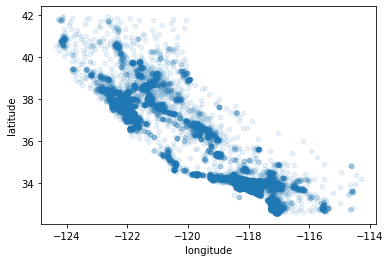

In [31]:
housing_data.plot(kind='scatter',x='longitude',y='latitude',alpha=.1)

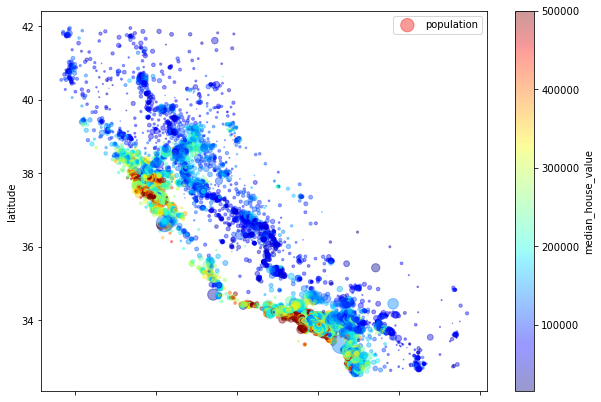

In [32]:
import matplotlib.pyplot as plt
housing_data.plot(kind='scatter',x='longitude',y='latitude',alpha=.4,
            s=housing_data['population']/100,label='population',figsize=(10,7),
            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

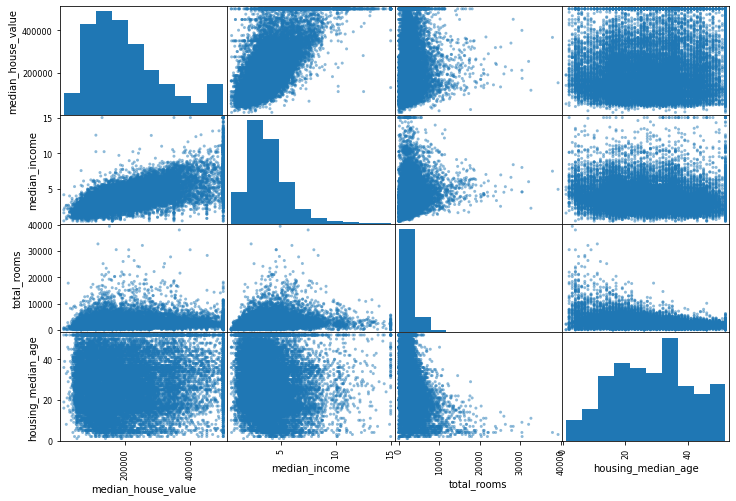

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing_data[['median_house_value','median_income','total_rooms','housing_median_age']],figsize=(12,8))

<br/><br/><br/>
<hr style="border: 5px solid #990000;" />
<hr style="border: 1px solid #dbbcac;" />

#  Model selection

### 1. Ridge & Linear regression

In [34]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=1)

In [35]:
from sklearn.metrics import mean_squared_error
train_pred=ridge_reg.predict(X_train)
test_pred=ridge_reg.predict(X_test)
print('Train set mse:', np.sqrt(mean_squared_error(y_train,train_pred)))
print('Test set mse:', np.sqrt(mean_squared_error(y_test,test_pred)))

Train set mse: 67709.97780502912
Test set mse: 68677.78184307538


#### To compare with linear regression, let's compute linear regression.

In [36]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error
train_pred=lin_reg.predict(X_train)
test_pred=lin_reg.predict(X_test)
print('Train set mse:', np.sqrt(mean_squared_error(y_train,train_pred)))
print('Test set mse:', np.sqrt(mean_squared_error(y_test,test_pred)))

Train set mse: 67709.15957860458
Test set mse: 68668.9958751445


#### There aren't much differences between ridge & linear regression.
#### Thus, to ensure this model is right, I wil compute p-value for each instance & VIF.

In [37]:
import statsmodels.api as sm
from scipy import stats

est = sm.OLS(y_train, X_train.values)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2073.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:34:19   Log-Likelihood:            -2.0501e+05
No. Observations:               16346   AIC:                         4.101e+05
Df Residuals:                   16330   BIC:                         4.102e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -5.672e+04   2286.530    -24.804      0.0

#### First, we have to get rid of x11(polulation_per_household) since Its p-value is >0.05
#### And I'll do the same thing again

In [38]:
X_train=X_train.drop('population_per_household',axis=1)
X_test=X_test.drop('population_per_household',axis=1)

In [39]:
est = sm.OLS(y_train, X_train.values)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2221.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:34:23   Log-Likelihood:            -2.0501e+05
No. Observations:               16346   AIC:                         4.101e+05
Df Residuals:                   16331   BIC:                         4.102e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -5.672e+04   2286.528    -24.807      0.0

#### First, we have to get rid of x5(total_bedrooms) since Its p-value is >0.05
#### And I'll do the same thing again

In [40]:
X_train=X_train.drop('total_bedrooms',axis=1)
X_test=X_test.drop('total_bedrooms',axis=1)

In [41]:
est = sm.OLS(y_train, X_train.values)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2391.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:34:24   Log-Likelihood:            -2.0501e+05
No. Observations:               16346   AIC:                         4.101e+05
Df Residuals:                   16332   BIC:                         4.102e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -5.656e+04   2284.167    -24.763      0.0

#### It's okay with p-value. 
#### Next, let's compute VIF

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif

,VIF Factor,features
0,18.582749,longitude
1,20.541291,latitude
2,1.324484,housing_median_age
3,13.306542,total_rooms
4,6.023887,population
5,15.273432,households
6,2.121860,median_income
7,1.449021,rooms_per_household
8,2.303545,bedrooms_per_room
9,1.362649,ocean_1


#### longitude, latitude, households have some probelms with VIF, but it is not that high, so I will leave these attributes.
#### So, everything is done. Let's fit linear regression & Ridge again.

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error
train_pred=lin_reg.predict(X_train)
test_pred=lin_reg.predict(X_test)
print('Train set mse:', np.sqrt(mean_squared_error(y_train,train_pred)))
print('Test set mse:', np.sqrt(mean_squared_error(y_test,test_pred)))

Train set mse: 67717.0889365798
Test set mse: 68694.17690627022


In [44]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=1)

In [45]:
from sklearn.metrics import mean_squared_error
train_pred=ridge_reg.predict(X_train)
test_pred=ridge_reg.predict(X_test)
print('Train set mse:', np.sqrt(mean_squared_error(y_train,train_pred)))
print('Test set mse:', np.sqrt(mean_squared_error(y_test,test_pred)))

Train set mse: 67717.08715323955
Test set mse: 68708.14370642159


#### It has almost same test set MSE with above. 
#### But 2 attributes are removed, so this model is better than the above.

---
### 2. Support Vector Regression

In [46]:
from sklearn.svm import SVR
svl=SVR(kernel='rbf',C=1.0,epsilon=0.1,gamma='scale')

In [47]:
svl.fit(X_train,y_train)

SVR()

In [48]:
train_pred=svl.predict(X_train)
test_pred=svl.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(y_train,train_pred))

118247.7076512122

In [50]:
np.sqrt(mean_squared_error(y_test,test_pred))

118517.13217108771

#### Not good performance. Just discard it.

---
### 3. XGBoost

In [51]:
import xgboost

In [52]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10,reg_lambda=10)

In [53]:
xgb_model.fit(X_train,y_train,eval_metric='rmse')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=10, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

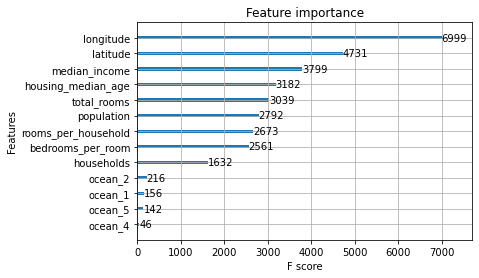

In [54]:
xgboost.plot_importance(xgb_model)

In [55]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)

0.9365147388434211


#### It has good r_sq compared with linear regression(0.65)

In [56]:
train_pred = xgb_model.predict(X_train)
test_pred=xgb_model.predict(X_test)

In [57]:
print('Train set mse:', np.sqrt(mean_squared_error(y_train,train_pred)))
print('Test set mse:', np.sqrt(mean_squared_error(y_test,test_pred)))

Train set mse: 29072.086083462476
Test set mse: 46859.33370566649


#### There is some overfitting but this model has Great performance. I'll do this again with gridsearchcv

In [58]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'max_depth': range(7,10,1),
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0.8,0.9],
              'n_estimators': range(100,400,100),
              'reg_lambda': range(0,50,10)}

In [59]:
from sklearn import model_selection
xg=xgboost.XGBRegressor(objective='reg:squarederror',max_depth=5,alpha=10)

In [60]:
grid_search_xg = model_selection.GridSearchCV(estimator = xg, 
                                              param_grid = parameters,
                                              scoring='neg_mean_squared_error',
                                              cv = 10 )

In [61]:
grid_search_xg.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(alpha=10, base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=5, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100,...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [62]:
grid_search_xg.best_params_

{'colsample_bytree': 0.9,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 200,
 'nthread': 4,
 'reg_lambda': 40,
 'subsample': 0.7}

In [63]:
np.sqrt(-grid_search_xg.best_score_)

46098.68355532092

In [64]:
train_pred = grid_search_xg.predict(X_train)
test_pred=grid_search_xg.predict(X_test)

In [65]:
print('Train set mse:', np.sqrt(mean_squared_error(y_train,train_pred)))
print('Test set mse:', np.sqrt(mean_squared_error(y_test,test_pred)))

Train set mse: 23991.621910310558
Test set mse: 47093.59037329869


#### Great performance again unless it is overfitted.
#### I will consider MLP model at last.

---
### Deep Neural Net

In [66]:
from tensorflow.keras.layers import  Dense, Dropout
from tensorflow.keras.models import Sequential

Init Plugin
Init Graph Optimizer
Init Kernel


In [67]:
print(X_train.shape)
print(X_test.shape)

(16346, 14)
(4087, 14)


In [68]:
model = Sequential()
model.add(Dense(256, activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))


Metal device set to: Apple M1


2021-10-18 22:12:37.288116: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-18 22:12:37.288417: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3840      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1

In [70]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [71]:
model.fit(X_train,y_train,batch_size=64,epochs=20,validation_split=.3)

2021-10-18 22:12:44.766903: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-18 22:12:44.770300: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2021-10-18 22:12:45.000824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


178/179 [============================>.] - ETA: 0s - loss: 19308081152.0000 - mae: 99066.8516

2021-10-18 22:12:47.605771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


179/179 [==============================] - 3s 15ms/step - loss: 19252250624.0000 - mae: 98904.8516 - val_loss: 6980237824.0000 - val_mae: 56208.5352
Epoch 2/20
179/179 [==============================] - 3s 14ms/step - loss: 6528780800.0000 - mae: 58380.2031 - val_loss: 4812587008.0000 - val_mae: 47455.3906
Epoch 3/20
179/179 [==============================] - 3s 14ms/step - loss: 5987504640.0000 - mae: 55464.4531 - val_loss: 4522434048.0000 - val_mae: 48598.0938
Epoch 4/20
179/179 [==============================] - 3s 14ms/step - loss: 5834428416.0000 - mae: 54845.0273 - val_loss: 4382889984.0000 - val_mae: 46508.6719
Epoch 5/20
179/179 [==============================] - 2s 14ms/step - loss: 5732960768.0000 - mae: 54038.9297 - val_loss: 4497751552.0000 - val_mae: 45870.5000
Epoch 6/20
179/179 [==============================] - 3s 14ms/step - loss: 5712737280.0000 - mae: 54075.5938 - val_loss: 4233073920.0000 - val_mae: 46019.8281
Epoch 7/20
179/179 [==============================] - 3s

In [72]:
np.sqrt(model.evaluate(X_test,y_test)[0])

128/128 [==============================] - 1s 4ms/step - loss: 4091914752.0000 - mae: 42873.4453


63968.07603797382

#### Not that good. 
#### I'll select final model as grid_search_xg
